# Parker Solar Probe Data Download Example

Tamar Ervin

- Downloading [PSP](https://link.springer.com/article/10.1007/s11214-015-0211-6) data with [PySPEDAS](https://pyspedas.readthedocs.io/en/latest/)
- Using [pyTplot](https://pytplot.readthedocs.io/en/latest/) to plot the data


In [9]:

import pyspedas
from pyspedas import time_string
from pytplot import tplot, get_data
import astrospice
import sunpy 
import sunpy.coordinates as scoords
import sys, os
import datetime
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

03-Nov-23 12:52:08: sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x17dcca400>

03-Nov-23 12:52:09: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/asyncio/base_events.py:654: ResourceWarning: unclosed event loop <_UnixSelectorEventLoop running=False closed=False debug=False>
  _warn(f"unclosed event loop {self!r}", ResourceWarning, source=self)

03-Nov-23 12:52:09: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

03-Nov-23 12:52:09: sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x168ae64c0>



## Download and Plot the Data

Example data to download:
- [FIELDS](https://link.springer.com/article/10.1007/s11214-016-0244-5): Radial, Tangential, Normal (RTN) magnetic field data
- [SWEAP/SPAN-I](https://iopscience.iop.org/article/10.3847/1538-4357/ac93f5) Proton: Radial, Tangential, Normal (RTN) proton velocity and proton density data
- [SWEAP/SPAN-I](https://iopscience.iop.org/article/10.3847/1538-4357/ac93f5) Alpha Particle: Radial, Tangential, Normal (RTN) alpha particle velocity and density

Data will download to a folder titled 'psp_data' in this same repo!

Don't worry if this takes a while to run! The data is at a very high cadence and takes a bit to download depending on the time range

## Plot the data using pyTplot

[pyTplot](https://pytplot.readthedocs.io/en/latest/) is a Python package that works with PySPEDAS to plot space physics data! It already has all the information needed to plot observables in terms of their units! You can also create your own plots of the data using matplotlib.


In [2]:
### ------- TIME PERIOD OF INTEREST ------- ###
# this is an example of data from the heliospheric current sheet (HCS) crossing during PSP Encounter 15
time_range = ['2023-03-17/12:00', '2023-03-18/12:00']

03-Nov-23 12:49:57: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
03-Nov-23 12:49:58: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230317_v02.cdf
03-Nov-23 12:49:58: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230318_v02.cdf
03-Nov-23 12:50:00: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2023/
03-Nov-23 12:50:01: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230317_v02.cdf
03-Nov-23 12:50:01: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230318_v02.cdf
03-Nov-23 12:50:01: /Users/tamarervin/anaconda3/envs/psp38/lib/python3.8/asyncio/base_events.py:654: ResourceWarning: unclosed event loop <_UnixSelectorEventLoop running=False closed=False debug=False>
  _warn(f"unclosed event loop {sel

['psp_fld_l2_mag_RTN_4_Sa_per_Cyc', 'psp_fld_l2_quality_flags']


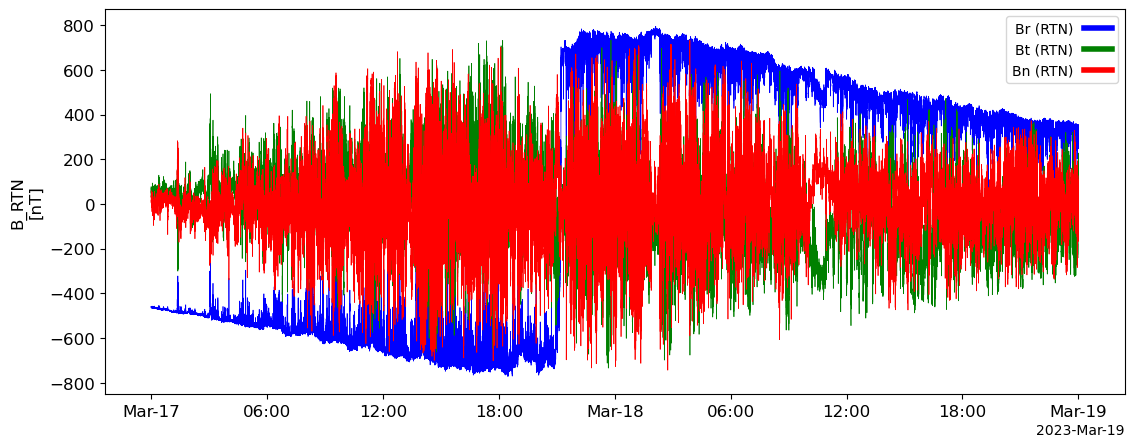

In [3]:
### ------- FIELDS: MAG RTN DATA ------- ###
fields_vars = pyspedas.psp.fields(trange=time_range, datatype='mag_RTN_4_Sa_per_Cyc')

### print out the variables stored in the magnetic field data
print(fields_vars)

### get the RTN magnetic field
B_RTN = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

### plot the data!
tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc'])

### CONVERT TIME FROM JULIAN TIME TO DATETIME OBJECT
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in B_RTN.times]

### CREATE DATAFRAME
rd = {'Time': date_obj, 'Br': B_RTN.y[:, 0], 'Bt': B_RTN.y[:, 1], 'Bn': B_RTN.y[:, 2]}
fields = pd.DataFrame(data=rd)

### SAVE DATAFRAME AS CSV
fields.to_csv(os.path.join('results', 'fields.csv')) 

03-Nov-23 12:50:46: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2023/


Using LEVEL=L3


03-Nov-23 12:50:47: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230317_v04.cdf
03-Nov-23 12:50:48: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230318_v04.cdf


['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


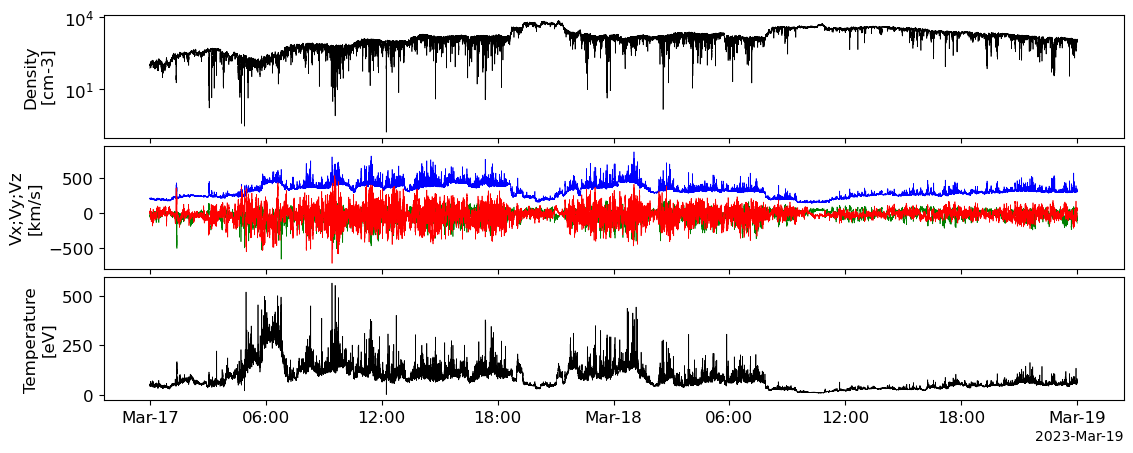

In [4]:
### ------- SPAN-I: PROTON (HYDROGEN) MOMENTS ------- ###
### download proton data
proton_vars = pyspedas.psp.spi(trange=time_range, datatype='sf00_l3_mom', level='l3')

### print out the variables stored in the proton data
print(proton_vars)

### get the RTN velocity, density, and temperature
Np = get_data('psp_spi_DENS')
vp_RTN = get_data('psp_spi_VEL_RTN_SUN')
Tp = get_data('psp_spi_TEMP')

### CONVERT TIME FROM JULIAN TIME TO DATETIME OBJECT
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in Np.times]

### CREATE DATAFRAME
rd = {'Time': date_obj, 'vr': vp_RTN.y[:, 0], 'vt': vp_RTN.y[:, 1], 'vn': vp_RTN.y[:, 2], 'Np': Np.y, 'Tp': Tp.y}
protons = pd.DataFrame(data=rd)

### SAVE DATAFRAME AS CSV
protons.to_csv(os.path.join('results', 'protons.csv'))

### plot the data!
tplot(['psp_spi_DENS', 'psp_spi_VEL_RTN_SUN', 'psp_spi_TEMP'])

03-Nov-23 12:50:57: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2023/


Using LEVEL=L3


03-Nov-23 12:50:58: File is current: psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2023/psp_swp_spi_sf0a_l3_mom_20230317_v04.cdf
03-Nov-23 12:50:58: File is current: psp_data/sweap/spi/l3/spi_sf0a_l3_mom/2023/psp_swp_spi_sf0a_l3_mom_20230318_v04.cdf


['psp_spi_QUALITY_FLAG', 'psp_spi_DENS', 'psp_spi_VEL_INST', 'psp_spi_VEL_SC', 'psp_spi_VEL_RTN_SUN', 'psp_spi_T_TENSOR_INST', 'psp_spi_TEMP', 'psp_spi_EFLUX_VS_ENERGY', 'psp_spi_EFLUX_VS_THETA', 'psp_spi_EFLUX_VS_PHI', 'psp_spi_SUN_DIST', 'psp_spi_VENUS_DIST', 'psp_spi_SC_VEL_RTN_SUN', 'psp_spi_QUAT_SC_TO_RTN', 'psp_spi_MAGF_SC', 'psp_spi_MAGF_INST']


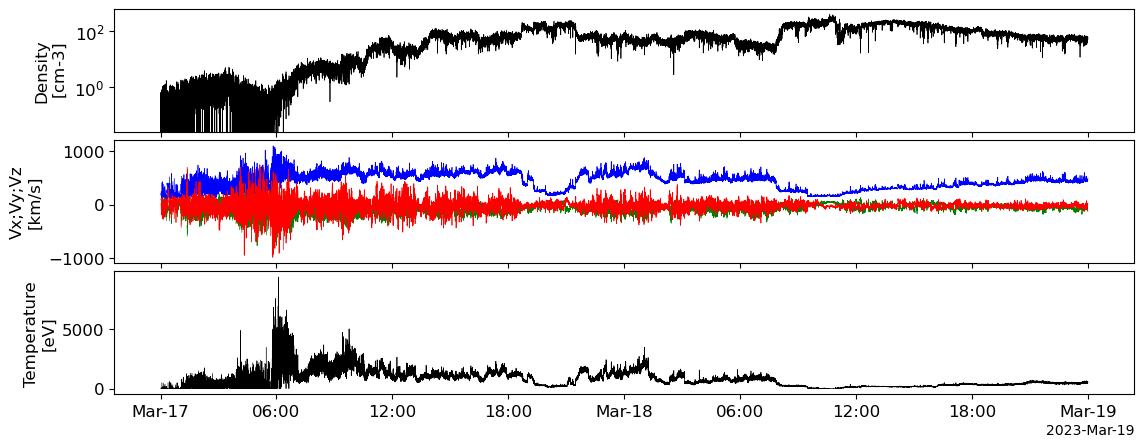

In [5]:
### ------- SPAN-I: ALPHA PARTICLE (HELIUM) MOMENTS ------- ###
### download alpha particle data
alpha_vars = pyspedas.psp.spi(trange=time_range, datatype='sf0a_l3_mom', level='l3')

### print out the variables stored in the alpha particle data
print(alpha_vars)

### READ IN SWEAP VELOCITY (RTN), DENSITY, AND TEMPERATURE DATA
Na = get_data('psp_spi_DENS')
va_RTN = get_data('psp_spi_VEL_RTN_SUN')
Ta = get_data('psp_spi_TEMP')

### CONVERT TIME FROM JULIAN TIME TO DATETIME OBJECT
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in Na.times]

### CREATE DATAFRAME
rd = {'Time': date_obj, 'vr': va_RTN.y[:, 0], 'vt': va_RTN.y[:, 1], 'vn': va_RTN.y[:, 2], 'Na': Na.y, 'Ta': Ta.y}
alphas = pd.DataFrame(data=rd)

### SAVE DATAFRAME AS CSV
alphas.to_csv(os.path.join('results', 'alphas.csv'))

### plot the data!
tplot(['psp_spi_DENS', 'psp_spi_VEL_RTN_SUN', 'psp_spi_TEMP'])

# Create Parker FIELDS/SWEAP Dataframe

Now that we have a dataframe for each instrument, we then use pandas to merge the dataframes as a function of time.



In [6]:
### merge the PAS and MAG dataframes
merged_df = pd.merge_asof(fields, protons, on='Time', direction='backward')

### merge the HIS and newly merged dataframe
merged_df = pd.merge_asof(alphas, merged_df, on='Time', direction='backward')
merged_df = merged_df.set_index('Time')

## Find the spacecraft trajectory

Now we will use astrospice to generate the trajectory of the spacecraft. We transform from inertial coordinates to the solar co-rotating (Carrington) frame!

In [10]:
### Create SkyCoord for Parker in the inertial (J2000) frame
psp_inertial = astrospice.generate_coords(
    'SOLAR PROBE PLUS', pd.to_datetime(merged_df.index.to_list())

)

### Transform to solar co-rotating frame 
psp_carrington = psp_inertial.transform_to(
    scoords.HeliographicCarrington(observer="self")
)

Now we will add the position information to our merged dataframe and save as a CSV file!

In [11]:
### ADD POSITION INFORMAITON AND SAVE
parker = merged_df.copy()
parker['lon'] = psp_carrington.lon.value
parker['lat'] = psp_carrington.lat.value
parker['rAU'] = psp_carrington.radius.to(u.AU).value
parker['NpR2'] = parker.Np * (parker.rAU ** 2)
parker['BrR2'] = parker.Br * (parker.rAU ** 2)
parker.to_csv(os.path.join('results', 'parker.csv'))
parker

,vr_x,vt_x,vn_x,Na,Ta,Br,Bt,Bn,vr_y,vt_y,vn_y,Np,Tp,lon,lat,rAU,NpR2,BrR2
Time,,,,,,,,,,,,,,,,,,
2023-03-17 00:00:03.869595,136.413834,-66.148483,49.722652,0.388385,-0.000087,-460.497559,66.652130,25.975363,NaN,NaN,NaN,NaN,NaN,5.436847,-0.599451,0.081274,NaN,-3.041764
2023-03-17 00:00:07.364835,NaN,NaN,NaN,0.000000,NaN,-460.015228,73.225525,21.024397,216.121811,-8.346628,31.184471,72.195038,41.848660,5.438309,-0.599587,0.081272,0.476858,-3.038463
2023-03-17 00:00:10.860136,NaN,NaN,NaN,0.000000,NaN,-461.111633,69.096474,14.254626,201.977798,-8.060006,15.134486,83.939156,41.792698,5.439771,-0.599723,0.081270,0.554408,-3.045589
2023-03-17 00:00:14.355377,NaN,NaN,NaN,0.000000,NaN,-463.271484,45.696793,24.873411,204.622040,-2.734370,-8.305954,83.250435,47.484131,5.441233,-0.599858,0.081269,0.549839,-3.059739
2023-03-17 00:00:17.850618,213.295364,8.470299,84.349762,0.307426,-0.000088,-463.071014,45.171581,26.641287,208.022537,-24.612598,27.923014,88.809814,46.484776,5.442695,-0.599994,0.081267,0.586534,-3.058299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-18 23:59:45.415700,467.251678,-119.165878,4.757739,56.570091,499.240814,323.541870,117.854416,-40.503208,316.523438,-80.164185,51.505405,1178.158325,62.458263,112.948472,-2.228309,0.092909,10.169938,2.792834
2023-03-18 23:59:48.910940,464.533112,-115.335388,-0.120976,52.530193,589.464417,344.583527,48.452587,-47.286186,317.690277,-102.556511,35.999821,1232.727661,65.334381,112.949459,-2.228223,0.092911,10.641370,2.974575
2023-03-18 23:59:52.406241,480.955933,-100.031128,12.107570,50.822128,488.711578,323.028778,136.430649,-9.331066,310.887329,-84.589439,31.938829,1196.579346,63.912716,112.950445,-2.228137,0.092912,10.329698,2.788607
